# **Term Project**
#### MSML603 Priciples of Machine Learning

---

Name : Suraj Telugara Chandrashekhar

UID &emsp;: 119081877

## Notebook Setup

In [1]:
import warnings

# supress warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

COLOR_PALETTE = 'Set2'

h,w = 8,12
a = w/h

# set default figure size and color palette
sns.set(rc={"figure.figsize":(w, h)} )
sns.set_theme(style="white", palette=COLOR_PALETTE)

## Prepare the DataFrame

In [3]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/SurajTC/MPSML/main/MSML603_Project/Dataset/resume.csv'

# read the data from the url
df = pd.read_csv(url)
df.shape

(962, 2)

In [4]:
# rename columns
cols = [i.split('_')[0].lower() for i in df.columns.to_list()]
df.columns = cols

df.head()

,category,resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.isnull().sum()

category    0
resume      0
dtype: int64

In [6]:
# target has 25 categories
df['category'].nunique(), np.sort(df['category'].unique())

(25, array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
        'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
        'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
        'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
        'Java Developer', 'Mechanical Engineer',
        'Network Security Engineer', 'Operations Manager', 'PMO',
        'Python Developer', 'SAP Developer', 'Sales', 'Testing',
        'Web Designing'], dtype=object))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  962 non-null    object
 1   resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [8]:
# count rows for each category
df_cat = df['category'].value_counts().reset_index()
df_cat.sort_values('index', inplace=True, ignore_index=True)
df_cat.rename(columns={'index':'category', 'category':'count'}, inplace=True)
df_cat

,category,count
0,Advocate,20
1,Arts,36
2,Automation Testing,26
3,Blockchain,40
4,Business Analyst,28
5,Civil Engineer,24
6,Data Science,40
7,Database,33
8,DevOps Engineer,55
9,DotNet Developer,28


## Text Processing

In [9]:
import spacy
import re

spacy.prefer_gpu()

# load spacy for english module
nlp = spacy.load("en_core_web_sm")

def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)    # remove URLs
    txt = re.sub('RT|cc', ' ', txt)         # remove RT and cc
    txt = re.sub('#\S+', '', txt)           # remove hashtags
    txt = re.sub('@\S+', '  ', txt)         # remove mentions
    txt = re.sub('\s+', ' ', txt)           # remove extra whitespace

    # tokenize word
    txt = nlp(txt)
    # remove stop words
    txt = [w.text for w in txt if (not w.is_stop)]

    return ' '.join(txt)

In [10]:
# preprocess the resume string
df['resume'] = df['resume'].apply(lambda x: preprocess(x))

df.head()

,category,resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details b e uit rgpv data scientist ...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


## Exploratory Data Analysis



### 1. Category Distribution

- Visualize the data available for each category

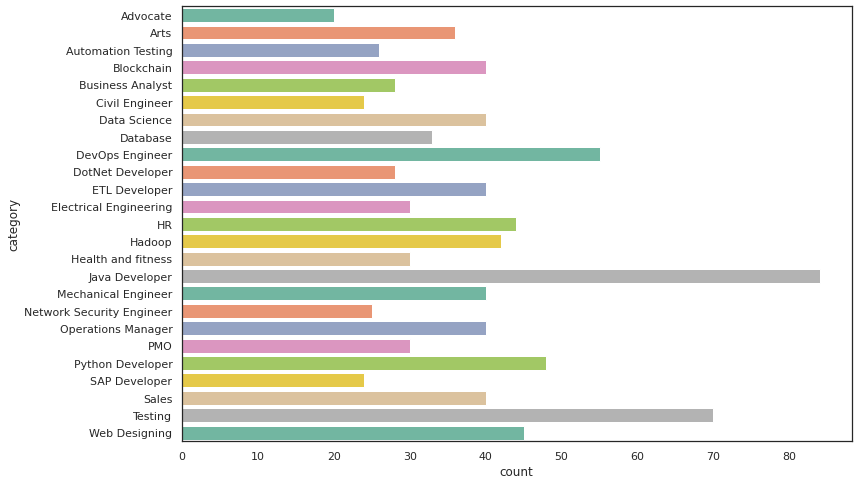

In [11]:
sns.barplot(x="count", y="category", data=df_cat, palette=COLOR_PALETTE)

- Visualize the data distribution

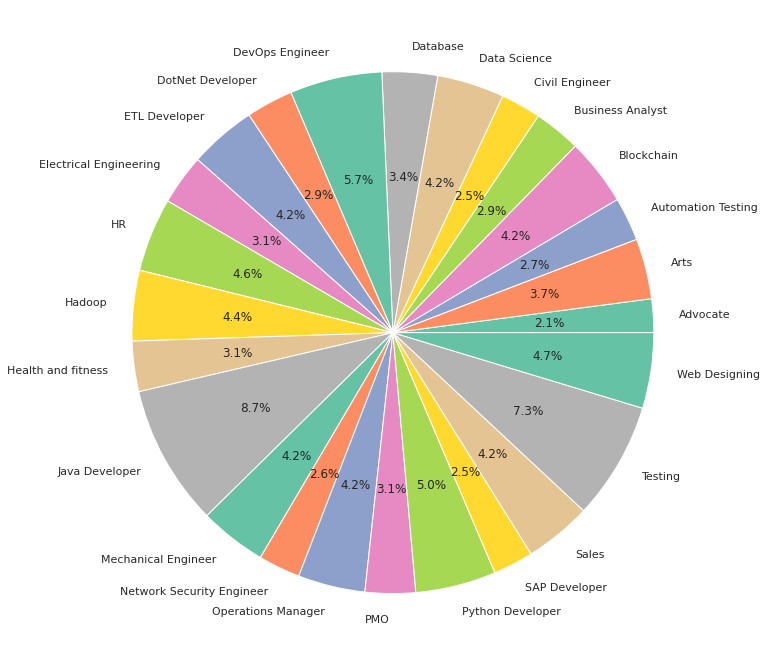

In [12]:
plt.figure(figsize=(12,12))

#create pie chart
plt.pie(df_cat['count'], labels= df_cat['category'], 
        colors = sns.color_palette(COLOR_PALETTE), autopct='%.1f%%')
plt.show()

### 2. Text Analysis

- 10 most common words

In [13]:
from collections import Counter

word_list = np.array([])

for txt in df['resume'].values:
  txt=nlp(txt)
  txt = [w.text  for w in txt if (not w.is_stop) and (w.pos_ not in ["PUNCT", "SPACE"])]
  word_list = np.concatenate((word_list, txt))
word_freq = Counter(word_list)
common_words = word_freq.most_common(10)

print('{:<15}\t{:<5}'.format("WORD", "FREQUENCY"))
for i in common_words:
  print('{:<15}\t{:<5}'.format(i[0], i[1]))

WORD           	FREQUENCY
exprience      	3829 
company        	3578 
project        	3498 
months         	3288 
description    	3122 
details        	3096 
data           	2156 
management     	1999 
team           	1950 
s              	1742 


- Wordcloud

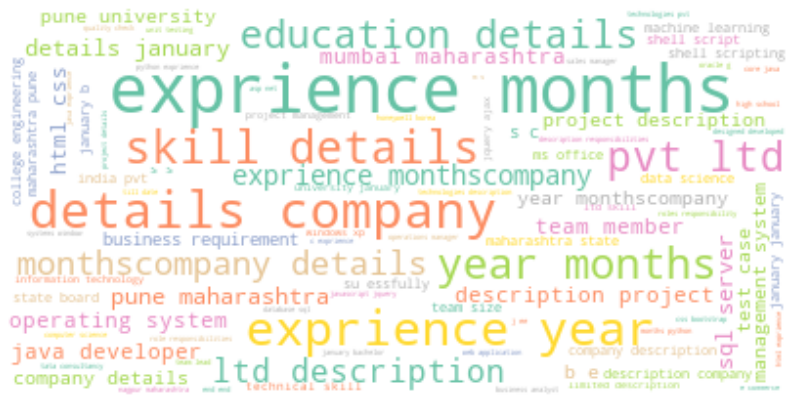

In [14]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', colormap=COLOR_PALETTE).generate(' '.join(df['resume'].values))
plt.figure(figsize=(14,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

- Word frequency table

In [15]:
# group by category
df_each_cat = [df[df['category'] == category].loc[:, ['resume', 'category']] 
               for category in np.sort(df['category'].unique())]

In [16]:
def wordfreq(df):
    count = df['resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['word', 'frequency']

    return count.head(10)

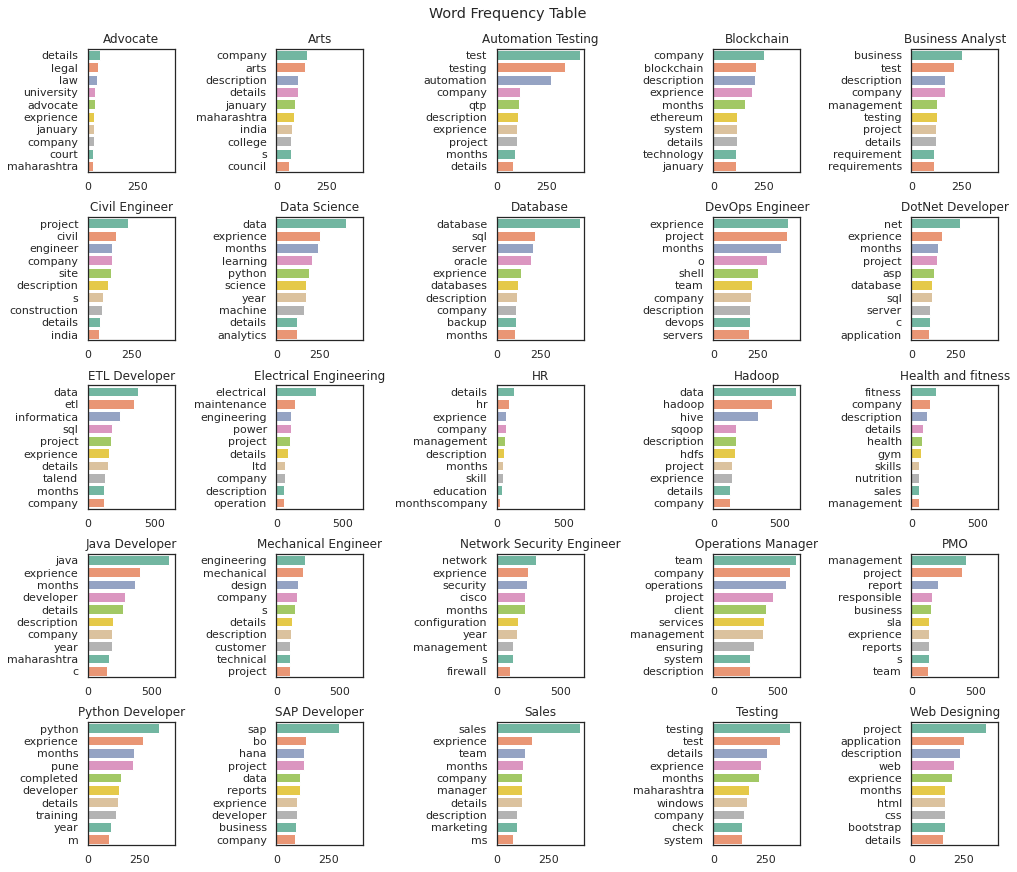

In [17]:
# plot most common words for each category
fig, axes = plt.subplots(5, 5, figsize=(14, 12), sharex='row', constrained_layout = True)
fig.suptitle('Word Frequency Table')

x=-1
for i, category in enumerate(df_cat['category']):
  wf = wordfreq(df_each_cat[i])
  x = (x+1) if i%5 == 0 else x
  sns.barplot(ax=axes[x, i%5], x=wf['frequency'], y=wf['word'], palette=COLOR_PALETTE
              ).set(title=category, xlabel=None, ylabel=None)

## Prepare the Data for Training

In [51]:
from sklearn.preprocessing import LabelEncoder

# label encode the categorical value
# df_train= df.copy()
df_train= pd.concat([df.drop_duplicates(subset="resume", keep='first'), 
                     df.drop_duplicates(subset="resume", keep='last')])

df_train['category']= LabelEncoder().fit_transform(df_train['category'])
df_train.head()

,category,resume
0,6,skills programming languages python pandas num...
1,6,education details b e uit rgpv data scientist ...
2,6,areas interest deep learning control system de...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

data = df_train['resume'].values
label = df_train['category'].values

# convert to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
vectorizer.fit(data)
features= vectorizer.transform(data)

features.shape

(332, 7014)

In [65]:
# stratified split
X_train,X_test,y_train,y_test= train_test_split(features, label, random_state=42, 
                                                test_size=0.3, shuffle=True, stratify=label)

X_train.shape, X_test.shape

((232, 7014), (100, 7014))

## Train the model

In [66]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [67]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier(),
    'Multinomial NB' : MultinomialNB()  
}

In [68]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))

In [69]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'Training Complete: {i}')

Training Complete: OneVsRestClassifier(estimator=KNeighborsClassifier())
Training Complete: OneVsRestClassifier(estimator=LogisticRegression())
Training Complete: OneVsRestClassifier(estimator=SVC())
Training Complete: OneVsRestClassifier(estimator=RandomForestClassifier())
Training Complete: OneVsRestClassifier(estimator=MultinomialNB())


## Evaluate the Performance

In [77]:
print('{:<50}\t{:<10}'.format("Classifier", "Accuracy"))
for count, value in enumerate(model_list):
    print('{:<50}\t{:<.4f}'.format(str(value), model_list[count].score(X_test, y_test)))

Classifier                                        	Accuracy  
OneVsRestClassifier(estimator=KNeighborsClassifier())	0.8300
OneVsRestClassifier(estimator=LogisticRegression())	0.8200
OneVsRestClassifier(estimator=SVC())              	0.9200
OneVsRestClassifier(estimator=RandomForestClassifier())	0.8800
OneVsRestClassifier(estimator=MultinomialNB())    	0.8400


In [71]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [72]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")


OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.67      0.80         3
           2       0.67      0.50      0.57         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      0.50      0.67         6
           7       0.78      1.00      0.88         7
           8       1.00      0.50      0.67         4
           9       0.80      1.00      0.89         4
          10       1.00      1.00      1.00         3
          11       0.40      0.67      0.50         3
          12       1.00      0.83      0.91         6
          13       1.00      1.00      1.00         4
          14       1.00      1.0

## KFold Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score, KFold

In [74]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result

In [75]:
print('{:<50}\t{:<10}'.format("Classifier", "r2 score"))
for name, result in results.items():
    print('{:<50}\t{:<.3f}'.format(str(name), round(np.mean(result),3)))

r2 scores
*********************************
OneVsRestClassifier(estimator=KNeighborsClassifier()) : 0.823
----------------
OneVsRestClassifier(estimator=LogisticRegression()) : 0.714
----------------
OneVsRestClassifier(estimator=SVC()) : 0.909
----------------
OneVsRestClassifier(estimator=RandomForestClassifier()) : 0.862
----------------
OneVsRestClassifier(estimator=MultinomialNB()) : 0.693
----------------


## Hyperparameter Tuning using GridSearch

In [78]:
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dict
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
#use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [79]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       0.75      1.00      0.86         6
           7       1.00      0.71      0.83         7
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       0.60      1.00      0.75         3
          11       0.60      1.00      0.75         3
          12       0.75      1.00      0.86         6
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         8
          16       0.60      1.00      0.75         3
          17       1.00    

## Resume Parsing

In [80]:
!pip install tika

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32892 sha256=6a68bdfef17f43a4c7bd9755c43dc47969e29678d27246b41f7395a63f8b70ea
  Stored in directory: /root/.cache/pip/wheels/75/66/8b/d1acbac7d49f3d98ade76c51ae5d72cec1866131a3b1ad9f82
Successfully built tika


In [81]:
from tika import parser

In [82]:
file = r'https://github.com/SurajTC/MPSML/raw/main/MSML603_Project/Dataset/resume_sample.pdf'
file_data = parser.from_file(file)

2022-12-19 10:42:01,122 [MainThread  ] [INFO ]  Retrieving https://github.com/SurajTC/MPSML/raw/main/MSML603_Project/Dataset/resume_sample.pdf to /tmp/surajtc-mpsml-raw-main-msml603_project-dataset-resume_sample.pdf.
INFO:tika.tika:Retrieving https://github.com/SurajTC/MPSML/raw/main/MSML603_Project/Dataset/resume_sample.pdf to /tmp/surajtc-mpsml-raw-main-msml603_project-dataset-resume_sample.pdf.
2022-12-19 10:42:01,484 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2022-12-19 10:42:02,202 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filep

In [83]:
text = file_data['content']
print(text)


























Resume_Live


Suraj T C
240-424-3295 | mail.surajtc@gmail.com | College Park, MD
linkedin.com/in/surajtc | github.com/surajtc

SUMMARY
Graduate student with a strong foundation in machine learning and experience with various algorithms
and frameworks. Seeking an opportunity where I can apply my skills and continue to learn and grow.

EDUCATION

Masters of Professional Studies in Machine Learning
University of Maryland, College Park

Expected May 2024

Bachelor of Engineering in Computer Science
Visvesvaraya Technological University, Belagavi

Aug 2017 - Aug 2021

EXPERIENCE

Frontend Developer (Remote)
Mainteny, Oslo

Developed web interface for maintenance companies using React.js for service
and property managers, providing end-to-end solution for maintenance tasks.

Dec 2021 - Aug 2022

Machine Learning Intern
IC Solutions, Bengaluru

Demonstrated strong problem-solving abilities through the creation of custom
regression models and a deep understanding of va

In [84]:
parsed_content = {}

In [85]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
print(email)
parsed_content['E-mail'] = email

['mail.surajtc@gmail.com']


In [86]:
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
if len(phone_number) <= 10:
    print(phone_number)
    parsed_content['Phone number'] = phone_number

['2404243295']


In [87]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)
  
   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
  
   matcher.add('NAME', [pattern], on_match = None)
  
   matches = matcher(nlp_text)
  
   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print(name)
parsed_content['Name'] =  name

Suraj T


In [88]:
Keywords = ["education",
            "summary",
            "accomplishments",
            "executive profile",
            "professional profile",
            "personal profile",
            "work background",
            "academic profile",
            "other activities",
            "qualifications",
            "experience",
            "interests",
            "skills",
            "achievements",
            "publications",
            "publication",
            "certifications",
            "workshops",
            "projects",
            "internships",
            "trainings",
            "hobbies",
            "overview",
            "objective",
            "position of responsibility",
            "jobs"
           ]

In [89]:
text = text.replace("\n"," ")
text = text.replace("[^a-zA-Z0-9]", " ");  
re.sub('\W+','', text)
text = text.lower()
print(text)

                         resume_live   suraj t c 240-424-3295 | mail.surajtc@gmail.com | college park, md linkedin.com/in/surajtc | github.com/surajtc  summary graduate student with a strong foundation in machine learning and experience with various algorithms and frameworks. seeking an opportunity where i can apply my skills and continue to learn and grow.  education  masters of professional studies in machine learning university of maryland, college park  expected may 2024  bachelor of engineering in computer science visvesvaraya technological university, belagavi  aug 2017 - aug 2021  experience  frontend developer (remote) mainteny, oslo  developed web interface for maintenance companies using react.js for service and property managers, providing end-to-end solution for maintenance tasks.  dec 2021 - aug 2022  machine learning intern ic solutions, bengaluru  demonstrated strong problem-solving abilities through the creation of custom regression models and a deep understanding of va

In [90]:
content = {}
indices = []
keys = []
for key in Keywords:
    try:
        content[key] = text[text.index(key) + len(key):]
        indices.append(text.index(key))
        keys.append(key)
    except:
        pass

In [91]:
#Sorting the indices
zipped_lists = zip(indices, keys)
sorted_pairs = sorted(zipped_lists)
sorted_pairs

tuples = zip(*sorted_pairs)
indices, keys = [ list(tuple) for tuple in  tuples]
keys

['summary', 'experience', 'skills', 'education', 'projects', 'certifications']

In [92]:
#Keeping the required content and removing the redundant part
content = []
for idx in range(len(indices)):
    if idx != len(indices)-1:
        content.append(text[indices[idx]: indices[idx+1]])
    else:
        content.append(text[indices[idx]: ])

In [93]:
for i in range(len(indices)):
    parsed_content[keys[i]] = content[i]  

In [94]:
parsed_content

{'E-mail': ['mail.surajtc@gmail.com'],
 'Phone number': ['2404243295'],
 'Name': 'Suraj T',
 'summary': 'summary graduate student with a strong foundation in machine learning and ',
 'experience': 'experience with various algorithms and frameworks. seeking an opportunity where i can apply my ',
 'skills': 'skills and continue to learn and grow.  ',
 'education': 'education  masters of professional studies in machine learning university of maryland, college park  expected may 2024  bachelor of engineering in computer science visvesvaraya technological university, belagavi  aug 2017 - aug 2021  experience  frontend developer (remote) mainteny, oslo  developed web interface for maintenance companies using react.js for service and property managers, providing end-to-end solution for maintenance tasks.  dec 2021 - aug 2022  machine learning intern ic solutions, bengaluru  demonstrated strong problem-solving abilities through the creation of custom regression models and a deep understanding 

In [95]:
pd.DataFrame(parsed_content.items()) 

,0,1
0,E-mail,[mail.surajtc@gmail.com]
1,Phone number,[2404243295]
2,Name,Suraj T
3,summary,summary graduate student with a strong foundat...
4,experience,experience with various algorithms and framewo...
5,skills,skills and continue to learn and grow.
6,education,education masters of professional studies in ...
7,projects,projects covid-19 detection from chest x-rays ...
8,certifications,certifications machine learning specialization...
